# Customer Mall Segmentation using K-Means machine learning algorithm

In [1]:
# Import Libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import mlflow
import mlflow.sklearn

In [2]:
# Dataset Loading

df= pd.read_csv('Mall_Customers_segmentation.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Label Encoder

In [5]:
df["Gender"]=LabelEncoder().fit_transform(df["Gender"])

df["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

## Select Features

In [6]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

## Apply Standard Scaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
import dagshub
dagshub.init(repo_owner='chandrasekharcse522',
             repo_name='Customer-Mall-Segmentation-Machine-Learning',
             mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Accessing as chandrasekharcse522

Initialized MLflow to track repo "chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning"

Repository chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning initialized!

🏃 View run abrasive-stork-567 at: https://dagshub.com/chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning.mlflow/#/experiments/0/runs/0afffe1d422540ef8f4bc56893ceac31
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning.mlflow/#/experiments/0


In [9]:
mlflow.set_experiment("customer_segmentation")

2025/11/07 12:09:35 INFO mlflow.tracking.fluent: Experiment with name 'customer_segmentation' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/2c83656a3d00402f9959240d992dc446', creation_time=1762497576697, experiment_id='1', last_update_time=1762497576697, lifecycle_stage='active', name='customer_segmentation', tags={}>

## train the model with K-Means 

In [14]:
import joblib
import os

os.makedirs("model", exist_ok=True)

with mlflow.start_run():
    k = 2  # for simplicity
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Log parameters and metrics
    mlflow.log_param("n_clusters", k)
    mlflow.log_metric("inertia", kmeans.inertia_)
    
    joblib.dump(kmeans, "model/kmeans_model.pkl")
    
    # Assign clusters
    df["Cluster"] = kmeans.labels_

print(df)
print("\n Model saved to 'model/kmeans_model.pkl'")

🏃 View run bittersweet-sow-937 at: https://dagshub.com/chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning.mlflow/#/experiments/1/runs/787a527a8c724c2691871febeb98a027
🧪 View experiment at: https://dagshub.com/chandrasekharcse522/Customer-Mall-Segmentation-Machine-Learning.mlflow/#/experiments/1
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197    

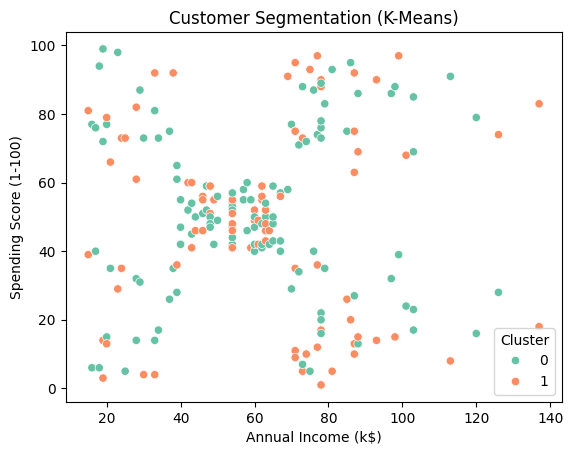

 Plot saved successfully to 'images/customer_segmentation.png'


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)
df["Cluster"] = kmeans.labels_
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set2")
plt.title("Customer Segmentation (K-Means)")
#  Save figure to images folder
plt.savefig("images/customer_segmentation.png", dpi=300, bbox_inches="tight")
plt.show()

print(" Plot saved successfully to 'images/customer_segmentation.png'")